# 第6回 演習

In [1]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３位まで表示
%precision 3

'%.3f'

### ■問題　6-1　データの操作と変換

（1）数学の成績を示すデータである「student-mat.csv」を読み込んで、データフレームstudent_data_mat_dfに変換してください。次にデータフレーム先頭10行を表示して縦横サイズとカラム（列）の情報を取得してください。本ファイルのセパレータは';'です。

In [3]:
#ファイル読み取り　ここにコードを追加
student_data_math_df = pd.read_csv('student-mat.csv', sep=';')
#縦横サイズ　ここにコードを追加
print(student_data_math_df.shape)
#カラム情報　ここにコードを追加
print(student_data_math_df.columns)
print(student_data_math_df.head(10))

(395, 33)
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other   

(2)データフレームから'age' 'G1' 'absences'という３つの項目だけを抜き出した新たなデータフレームthree_dfを生成してみましょう。該当するカラムのキーをリストにしてからそれをデータフレームの[]に指定すればよいです。

In [6]:
# 3項目のカラムだけを抽出してthree_dfを生成　ここにコードを追加
three_df = student_data_math_df[['age', 'G1', 'absences']]
print(three_df)

     age  G1  absences
0     18   5         6
1     17   5         4
2     15   7        10
3     15  15         2
4     16   6         4
..   ...  ..       ...
390   20   9        11
391   17  14         3
392   21  10         3
393   18  11         0
394   19   8         5

[395 rows x 3 columns]


(3)データフレームthree_df の'age'に着目して全体をソートしてみましょう。また'G1'に着目して全体をソートしてみましょう。左端のrowのインデクスはそのままでOKです。

In [14]:
# ageでソート　ここにコードを追加
three_df_sorted_by_age = three_df.sort_values(by='age')

# G1 でソート　ここにコードを追加
three_df_sorted_by_G1 = three_df.sort_values(by='G1')

print('ageでソート')
print(three_df_sorted_by_age.head(5))
print('-'*25)
print('G1でソート')
print(three_df_sorted_by_G1.head(5))


ageでソート
     age  G1  absences
130   15  12         0
102   15  10         4
103   15   7        26
104   15  16         0
105   15  10        10
-------------------------
G1でソート
     age  G1  absences
248   18   3         8
137   16   4         0
0     18   5         6
1     17   5         4
79    16   5        12


(4) three_dfの「`G1`」のカラムについて、以下のビンに分けてcut_dataというデータフレームを作ってください。次に、ビンの人数を数えてください。なお、`cut`のデフォルトの挙動は右側が閉区間ですが、`right=False`のオプションを指定して、右側を開区間としてください。

In [15]:
#　分割の粒度
bins = [0, 5, 10, 15, 20]

# ビン分割　ここにコードを追加
cut_data = pd.cut(three_df['G1'], bins=bins, right=False)
#カウント　ここにコードを追加
print(cut_data.value_counts())

G1
[10, 15)    188
[5, 10)     140
[15, 20)     65
[0, 5)        2
Name: count, dtype: int64


(5)three_dfの「`G1`」のカラムについて、`qcut`を用いて４つのビンに分けてみましょう。

In [ ]:
# ビン分割　ここにコードを追加
qcut_data = pd.qcut(three_df['G1'], q=4)

#カウント　ここにコードを追加
print(qcut_data.value_counts())

0      (2.999, 8.0]
1      (2.999, 8.0]
2      (2.999, 8.0]
3      (13.0, 19.0]
4      (2.999, 8.0]
           ...     
390     (8.0, 11.0]
391    (13.0, 19.0]
392     (8.0, 11.0]
393     (8.0, 11.0]
394    (2.999, 8.0]
Name: G1, Length: 395, dtype: category
Categories (4, interval[float64, right]): [(2.999, 8.0] < (8.0, 11.0] < (11.0, 13.0] < (13.0, 19.0]]
G1
(8.0, 11.0]     121
(2.999, 8.0]    111
(13.0, 19.0]     95
(11.0, 13.0]     68
Name: count, dtype: int64


(4)と(5)はどちらも4個のビン分割をした度数分布ですが、各ビンの区間とビンに含まれるデータ数は違います。この差とN分位数の意味を考慮して考察してください。

 ここに考察を書く<br>
- # (4)の場合<br>
    pandasのcut()を使った場合は任意に決めた等間隔の区間で区切るためデータの分布が偏りやすいため各区間におけるデータ数が大幅に異なることがあると考えた。
- # (5)の場合<br>
    pandasのqcut()を使った場合はパラメータqに応じてデータ数が均等になるように区間を自動で決めてくれるため各区間におけるデータ数は均等になると考えた。

(5)最初のstudent_data_mat_dfのデータフレームで学校('school'）と性別（`sex`）を軸にして、`G1`、`G2`、`G3`の最大値、最小値をまとめて算出してください。複数の軸で、まずgroupbyを使ってグループ化した新しいデータフレームstudent_data_mat2 を作成します。
次に該当するカラム項目だけを.aggメソッドを使って複数関数　max とmin を適用します。複数カラムの指定時には、student_data_mat2[['G1','G2','G3']]のように[]が2重になることに注意しましょう。

In [21]:
# ここにコードを追加
student_data_math_df2 = student_data_math_df.groupby(['school', 'sex'])[['G1', 'G2', 'G3']].agg(['max', 'min'])
print(student_data_math_df2)

            G1      G2      G3    
           max min max min max min
school sex                        
GP     F    18   4  18   0  19   0
       M    19   3  19   0  20   0
MS     F    19   6  18   5  19   0
       M    15   6  16   5  16   0


### ■問題6-2 欠損値のあるcsvファイルからデータ計算
（１）EXCELで次のような欠損のあるテーブル(各科目のテスト成績)を作り、"score1.csv"というファイル名で保存してください。セパレータはコンマ(",")で文字コードはUTF-8とします。（ファイルは用意されています）

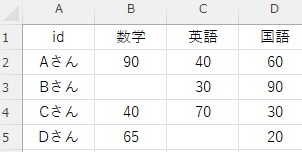


（2）EXCELで同様に次のような欠損のあるテーブルを作り、"score2.csv"というファイル名で保存してください。セパレータはコンマ(",")で文字コードはUTF-8とします。（ファイルは用意されています）

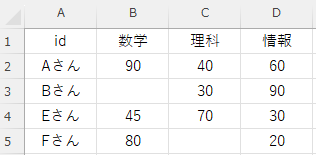

（3）"score1.csv"と"score2.csv"をpandasで読み込んでDataFrameに変換してください。それぞれdf1,df2という変数名にします。

In [24]:
#ここにコードを追加
df1 = pd.read_csv('score1.csv', sep=',')
df2 = pd.read_csv('score2.csv', sep=',')

(4) 特定の科目を受けていない学生もいますが、学生全員の成績表を作りたいと思います。この場合に、df1とdf2を適当な方法で結合して新たなデータフレームdf_mergeを作ってください。（merge how='outer'を使う）

In [25]:
#ここにコードを追加
df_merge = pd.merge(df1, df2, on='id', how='outer')
print(df_merge)

    id  数学_x    英語    国語  数学_y    理科    情報
0  Aさん  90.0  40.0  60.0  90.0  40.0  60.0
1  Bさん   NaN  30.0  90.0   NaN  30.0  90.0
2  Cさん  40.0  70.0  30.0   NaN   NaN   NaN
3  Dさん  65.0   NaN  20.0   NaN   NaN   NaN
4  Eさん   NaN   NaN   NaN  45.0  70.0  30.0
5  Fさん   NaN   NaN   NaN  80.0   NaN  20.0


(5) 表には多くの欠損値があるので、これを適当な方法で穴埋めしてください。どのような方法が適当でしょうか？考察して実行してください。<br>
・ヒント（各教科の平均で穴埋めする方針）：<br>
idの列(Column)は量的データではないので一度に平均値で埋めることはできません。
まず各科目の項目だけのデータフレームを作成し各科目の項目だけを項目の平均で穴埋めします。
最後にidの項目と穴埋めしたデータフレームとを単純に横に結合すればよいです。<br>
pd.concat([A,B], axis=1)を使います。

#ここに考察を書く<br>
テスト結果において欠席などをした際はそのテストの点数は0点として扱うのが公平であると考えた。  
NaNとなってしまっている教科については0を補うことでデータの整合性をとるのが良いと考えた。  
しかし、もしDB側のバグなどで受験をしたのにデータが破損してしまっている場合はそれもまた公平ではないのでその場合は周りの生徒との差がつかないように平均値をとってNaNを埋めるのが良いと考えた。  
今回はデータ欠損があまりにも多くDB側のバグとして扱うことにする。(平均値で埋める)

In [26]:
#ここにコードを追加
#注意：idの列(Column)は量的データではないので一度に平均値で埋めることはできない
subject_df = df_merge.drop('id', axis=1)
subject_fillna_df = subject_df.fillna(subject_df.mean())
df_merge_fill = pd.concat([df_merge['id'], subject_fillna_df], axis=1)
print(df_merge_fill)

    id  数学_x         英語    国語       数学_y         理科    情報
0  Aさん  90.0  40.000000  60.0  90.000000  40.000000  60.0
1  Bさん  65.0  30.000000  90.0  71.666667  30.000000  90.0
2  Cさん  40.0  70.000000  30.0  71.666667  46.666667  50.0
3  Dさん  65.0  46.666667  20.0  71.666667  46.666667  50.0
4  Eさん  65.0  46.666667  50.0  45.000000  70.000000  30.0
5  Fさん  65.0  46.666667  50.0  80.000000  46.666667  20.0
